In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA


#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
#import numpy as np
from itertools import product, combinations
#from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


In [2]:
# draw a vector
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)


In [3]:


pix_x = 40 # Amount of pixels horizontally
pix_y = 10 # Amount of pixels vertically
r =1  # radius of unit circumpherence
pos_begin =np.array( [1,0,0])

heading = np.pi/2
# Define sphere and begin position, velocity
#pos_begin = np.array([0,0,0])
spx= [2]#,-5]#, 3, 2]
spy= [2]#,-3]#, -2, 2]
spz= [0]#,-6]#, 3, -2]
rsp = [0.5]#,3]#, 0.5, 0.5]
V = [1,0,0]


In [4]:
# draw sphere


az, el = np.mgrid[-np.pi:np.pi:40j,-np.pi/6 :np.pi/6:10j]

#az, el = np.mgrid[0:2*np.pi:40j,0 :2*np.pi/6:10j]
# unit_mat_x = np.array(np.cos(az)*np.sin(el+np.pi/2))*r
# unit_mat_y = np.array(np.sin(az)*np.sin(el+np.pi/2))*r
# unit_mat_z = np.array(np.cos(el+np.pi/2))*r
unit_mat_x = np.array(np.cos(az)*np.sin(np.pi/2-el))*r
unit_mat_y = np.array(np.sin(az)*np.sin(np.pi/2-el))*r
unit_mat_z = np.array(np.cos(np.pi/2-el))*r
unit_vec_x = unit_mat_x.flatten()
unit_vec_y = unit_mat_y.flatten()
unit_vec_z= unit_mat_z.flatten()

# unit_vec_x = np.array(np.cos(az.flatten())*np.sin(np.pi/2-el.flatten()))*r
# unit_vec_y = np.array(np.sin(az.flatten())*np.sin(np.pi/2-el.flatten()))*r
# unit_vec_z = np.array(np.cos(np.pi/2-el.flatten()))*r



In [5]:
#print(el.shape, el)

In [6]:
az, el = np.mgrid[0:2*np.pi:40j,0:2*np.pi/2:10j]

#az, el = np.mgrid[0:2*np.pi:40j,0 :2*np.pi/6:10j]
# unit_mat_x = np.array(np.cos(az)*np.sin(el+np.pi/2))*r
# unit_mat_y = np.array(np.sin(az)*np.sin(el+np.pi/2))*r
# unit_mat_z = np.array(np.cos(el+np.pi/2))*r
unit_mat_x = np.array(np.cos(az)*np.sin(el))*r
unit_mat_y = np.array(np.sin(az)*np.sin(el))*r
unit_mat_z = np.array(np.cos(el))*r
unit_vec_x = unit_mat_x.flatten()
unit_vec_y = unit_mat_y.flatten()
unit_vec_z= unit_mat_z.flatten()



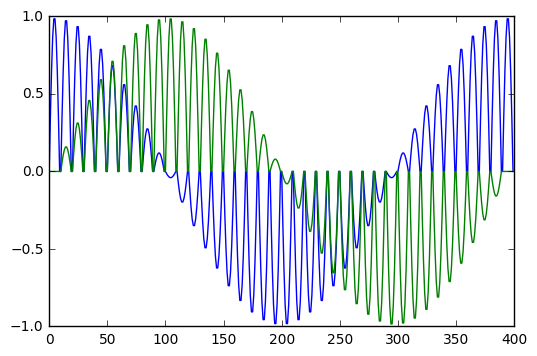

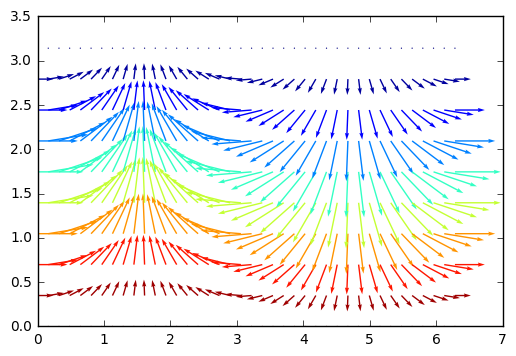

In [7]:
# Plot x, y values, sanity check
t = np.arange(len(unit_vec_z))
plotx = plt.plot(t,unit_vec_x, t,unit_vec_y)
plt.show()
plt.figure()
q= plt.quiver(az,el,unit_mat_x,unit_mat_y,unit_mat_z, scale = 10)
plt.show()

In [9]:

r_VEC = []
d_VEC = []
# for i in range(len(unit_vec_x)):
#     az_vec = az.flatten()
#     el_vec = el.flatten()
#     az_heading_included = az_vec #+ alpha
#     az_rot =az_heading_included[i]
#     el_rot =el_vec[i]
        
#     r_vec = np.sin(az_rot)*np.cos(el_rot)*unit_vec_x[i]+ np.sin(el_rot)*np.sin(az_rot)*unit_vec_y[i]+ np.cos(el_rot)*unit_vec_z[i]
#     d_vec = np.cos(az_rot)*np.cos(el_rot)*unit_vec_x[i] + np.cos(el_rot)*np.sin(az_rot)*unit_vec_y[i]-np.sin(el_rot)*unit_vec_z[i]
#     r_VEC.append(r_vec)
#     d_VEC.append(d_VEC)
    
# r_VEC = np.array(r_VEC)
# d_VEC = np.array(d_VEC)
# r_VEC = r_VEC.reshape(pix_x,pix_y) 
# d_VEC = d_VEC.reshape(pix_x,pix_y)
# q = plt.quiver(az,el, r_VEC, d_VEC)
# plt.show()

In [10]:
# Rotate optic flow vectors back
OF_rot_vec_x= []
OF_rot_vec_y = []
OF_rot_vec_z= []
OF_rot_vec_x1= []
OF_rot_vec_y1 = []
OF_rot_vec_z1= []
for i in range(len(az.flatten())):
    az_vec = az.flatten()
    el_vec = el.flatten()
    az_heading_included = az_vec #+ alpha
    az_rot =2*np.pi-az_heading_included[i]
    el_rot =npel_vec[i]
#     rot_z = np.array([np.cos(az_rot)*np.cos(el_rot), np.cos(az_rot)*np.cos(el_rot), -np.sin(el_rot)
#                       ,np.sin(az_rot)*np.sin(el_rot), np.sin(az_rot)*np.cos(el_rot),np.cos(az_rot),
#                        np.cos(el_rot), -np.sin(el_rot), 0])

    rot_z = np.array([np.cos(az_rot)*np.sin(el_rot), np.cos(az_rot)*np.cos(el_rot), np.cos(az_rot)*np.sin(el_rot)
                      ,-np.sin(az_rot)*np.cos(el_rot), np.cos(az_rot), -np.sin(el_rot)*np.sin(az_rot),
                       -np.sin(el_rot),0,np.cos(el_rot)])
    

#     rot_z = np.array([np.cos(az_rot), np.sin(az_rot)*np.cos(el_rot), np.sin(az_rot)*np.sin(el_rot)
#                       ,-np.sin(el_rot), np.cos(az_rot)*np.cos(el_rot), np.sin(el_rot)*np.cos(az_rot),
#                        0, -np.sin(el_rot),np.cos(el_rot)])
    
#     rot_z = np.array([np.cos(az_rot)*np.cos(el_rot), np.sin(az_rot)*np.cos(el_rot), np.sin(el_rot)
#                       ,-np.sin(az_rot), np.cos(az_rot), 0,
#                        -np.sin(el_rot)*np.cos(az_rot),-np.sin(el_rot) * np.sin(az_rot),np.cos(el_rot)])
    
    rot_z = rot_z.reshape(3,3)
#     rot_z1 = rot_z1.reshape(3,3)
    #print(rot_z)
    mat = np.array([unit_vec_x[i],unit_vec_y[i], unit_vec_z[i]])
    mat_rot_z = np.dot(rot_z, mat)
    #mat_rot_z = np.dot(mat,rot_z)
#     mat_rot_z1 = np.dot(rot_z1, mat)
    OF_rot_vec_x.append(mat_rot_z[0])
    OF_rot_vec_y.append(mat_rot_z[1])
    OF_rot_vec_z.append(mat_rot_z[2])
    #print(mat_rot_z[0],mat_rot_z[2], az_vec[i], el_vec[i])
#     OF_rot_vec_x1.append(mat_rot_z1[0])
#     OF_rot_vec_y1.append(mat_rot_z1[1])
#     OF_rot_vec_z1.append(mat_rot_z1[2])
#     if np.sum(mat_rot_z)!= 0:
#         print(mat_rot_z, 'nonzero', i)
#     if np.sum(mat_rot_z1)!= 0:
#         print(mat_rot_z1, 'nonzero', i)

OF_mat_rot = np.vstack([OF_rot_vec_x, OF_rot_vec_y, OF_rot_vec_z])
OF_mat_rot2 = OF_mat_rot.reshape(3, pix_x,pix_y)
#print(OF_mat_rot2)

NameError: name 'npel_vec' is not defined

In [11]:

q = plt.quiver(az,el, OF_mat_rot2[0,:,:], OF_mat_rot2[1,:,:],
                #              OF2[2,:,:] , 
                np.linalg.norm(OF_mat_rot2[:,:,:],axis=0)/100 , 
               scale =4)
plt.show()

NameError: name 'OF_mat_rot2' is not defined

In [12]:
# create 3D vecotr plot
# include pos begin


figVec = False

if figVec == True:
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    ax.plot_wireframe(unit_vec_x, unit_vec_y, unit_vec_z, color="r")
    for i in range(1,len(unit_vec_z),1):
        # print(x[i], y[i], z[i])
        a = Arrow3D([pos_begin[0]+unit_vec_x[i], 2*unit_vec_x[i]+pos_begin[0]],
                    [pos_begin[1]+unit_vec_y[i], 2*unit_vec_y[i]+pos_begin[1]], 
                    [pos_begin[2]+unit_vec_z[i],pos_begin[2]+ 2*unit_vec_z[i]], mutation_scale=20,
                lw=1, arrowstyle="-|>", color="k")
        norm =LA.norm([unit_vec_x[i], unit_vec_y[i], unit_vec_z[i]])
        print (norm)
        q = ax.add_artist(a)
        ax.set_xlim([-1, 5])
        ax.set_ylim([-1, 5])
        ax.set_zlim([-1,5])
    
    plt.show()


# Rotation

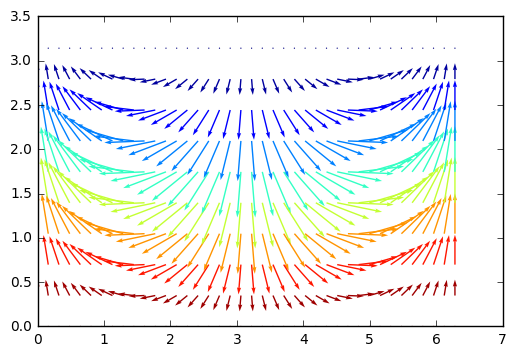

In [13]:

alpha = np.ones(len(unit_vec_x)) * heading 
rot_vec_x = []
rot_vec_y = []
rot_vec_z = []

for i in range(len(alpha)):
    alpha_val = alpha[i]
    rot = np.array([np.cos(alpha_val), -np.sin(alpha_val), 0,np.sin(alpha_val), np.cos(alpha_val),0, 0,0,1])
    rot = rot.reshape(3,3)
    mat = np.array([unit_vec_x[i],unit_vec_y[i], unit_vec_z[i]])
    mat_rot = np.dot(rot, mat)
    #mat_rot = np.multiply(rot,mat)
    rot_vec_x.append(mat_rot[0])
    rot_vec_y.append(mat_rot[1])
    rot_vec_z.append(mat_rot[2])
# print(mat_rot)
pos_rot_mat =np.vstack([np.array(rot_vec_x), np.array(rot_vec_y), np.array(rot_vec_y)])
pos_rot2 = pos_rot_mat.reshape(3,pix_x,pix_y)
#q = plt.quiver(u,v,pos_rot2[0,:,:] , pos_rot2[1,:,:],pos_rot2[2,:,:],  scale = 10)
q = plt.quiver(az,el,rot_vec_x,rot_vec_y,rot_vec_z,  scale = 10)
plt.show()


In [14]:
# Rotate optic flow vectors back
OF_rot_vec_x= []
OF_rot_vec_y = []
OF_rot_vec_z= []
OF_rot_vec_x1= []
OF_rot_vec_y1 = []
OF_rot_vec_z1= []
for i in range(len(alpha)):
    az_vec = az.flatten()
    el_vec = el.flatten()
    az_heading_included = az_vec + alpha
    az_rot = az_heading_included[i]
    el_rot = el_vec[i]
    rot_z = np.array([np.cos(az_rot)*np.cos(el_rot), np.sin(az_rot), np.cos(az_rot)*np.sin(el_rot)
                      ,-np.sin(az_rot)*np.cos(el_rot), np.cos(az_rot), -np.sin(el_rot)*np.sin(az_rot),
                       -np.sin(el_rot),0,np.cos(el_rot)])
#     rot_z = np.array([np.cos(az_rot), np.sin(az_rot)*np.cos(el_rot), np.sin(az_rot)*np.sin(el_rot)
#                       ,-np.sin(el_rot), np.cos(az_rot)*np.cos(el_rot), np.sin(el_rot)*np.cos(az_rot),
#                        0, -np.sin(el_rot),np.cos(el_rot)])
    
    rot_z = np.array([np.cos(az_rot)*np.cos(el_rot), np.sin(az_rot)*np.cos(el_rot), np.sin(el_rot)
                      ,-np.sin(az_rot), np.cos(az_rot), 0,
                       -np.sin(el_rot)*np.cos(az_rot),-np.sin(el_rot) * np.sin(az_rot),np.cos(el_rot)])
    
    rot_z = rot_z.reshape(3,3)
#     rot_z1 = rot_z1.reshape(3,3)
    #print(rot_z)
    mat = np.array([rot_vec_x[i],rot_vec_y[i], rot_vec_z[i]])
    mat_rot_z = np.dot(rot_z, mat)
#     mat_rot_z1 = np.dot(rot_z1, mat)
    OF_rot_vec_x.append(mat_rot_z[0])
    OF_rot_vec_y.append(mat_rot_z[1])
    OF_rot_vec_z.append(mat_rot_z[2])
#     OF_rot_vec_x1.append(mat_rot_z1[0])
#     OF_rot_vec_y1.append(mat_rot_z1[1])
#     OF_rot_vec_z1.append(mat_rot_z1[2])
#     if np.sum(mat_rot_z)!= 0:
#         print(mat_rot_z, 'nonzero', i)
#     if np.sum(mat_rot_z1)!= 0:
#         print(mat_rot_z1, 'nonzero', i)

OF_mat_rot = np.vstack([OF_rot_vec_x, OF_rot_vec_y, OF_rot_vec_z])
OF_mat_rot2 = OF_mat_rot.reshape(3, pix_x,pix_y)
#print(OF_mat_rot2)

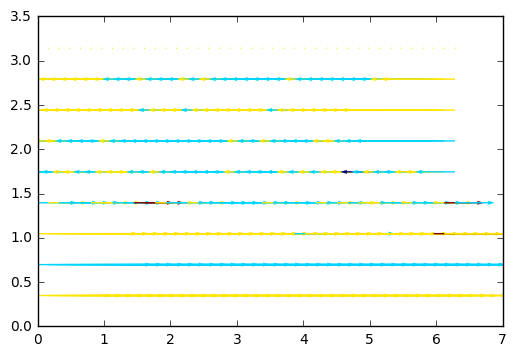

In [15]:

q = plt.quiver(az,el, OF_mat_rot2[0,:,:], OF_mat_rot2[1,:,:],
                #              OF2[2,:,:] , 
                np.linalg.norm(OF_mat_rot2[:,:,:],axis=0)/100 , 
               scale =4)
plt.show()

## UNTIL HERE IT IS VALIDATED

In [16]:
## source > http://paulbourke.net/geometry/circlesphere/ 
##source code: http://paulbourke.net/geometry/circlesphere/sphere_line_intersection.py

def sphere_line_intersection(l1, l2, sp, r):

    def square(f):
        return f * f
    from math import sqrt

    # l1[0],l1[1],l1[2]  P1 coordinates (point of line)
    # l2[0],l2[1],l2[2]  P2 coordinates (point of line)
    # sp[0],sp[1],sp[2], r  P3 coordinates and radius (sphere)
    # x,y,z   intersection coordinates
    #
    # This function returns a pointer array which first index indicates
    # the number of intersection point, followed by coordinate pairs.

    p1 = p2 = None

    a = square(l2[0] - l1[0]) + square(l2[1] - l1[1]) + square(l2[2] - l1[2])
    b = 2.0 * ((l2[0] - l1[0]) * (l1[0] - sp[0]) +
               (l2[1] - l1[1]) * (l1[1] - sp[1]) +
               (l2[2] - l1[2]) * (l1[2] - sp[2]))

    c = (square(sp[0]) + square(sp[1]) + square(sp[2]) + square(l1[0]) +
            square(l1[1]) + square(l1[2]) -
            2.0 * (sp[0] * l1[0] + sp[1] * l1[1] + sp[2] * l1[2]) - square(r))

    i = b * b - 4.0 * a * c

    if i < 0.0:
        pass  # no intersections
    elif i == 0.0:
        # one intersection
        p[0] = 1.0

        mu = -b / (2.0 * a)
        p1 = (l1[0] + mu * (l2[0] - l1[0]),
              l1[1] + mu * (l2[1] - l1[1]),
              l1[2] + mu * (l2[2] - l1[2]),
              )

    elif i > 0.0:
        # first intersection
        mu = (-b + sqrt(i)) / (2.0 * a)
        p1 = (l1[0] + mu * (l2[0] - l1[0]),
              l1[1] + mu * (l2[1] - l1[1]),
              l1[2] + mu * (l2[2] - l1[2]),
              )

        # second intersection
        mu = (-b - sqrt(i)) / (2.0 * a)
        p2 = (l1[0] + mu * (l2[0] - l1[0]),
              l1[1] + mu * (l2[1] - l1[1]),
              l1[2] + mu * (l2[2] - l1[2]),
              )

    return p1, p2

In [17]:
# Distance to intersection point

def distance_intersection(p1,p2,l2):
    distance=[] 
    distance2 = []
    if p1!=None:
        distance.append(LA.norm(np.array(np.array(p1)-l2)))
    if p2!=None:
        distance.append(LA.norm(np.array(np.array(p2)-l2)))
    if len(distance)>0:
        distance2= np.min(distance)
    return distance2


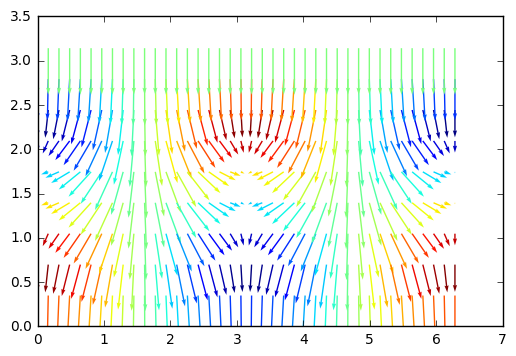

In [18]:
# check optic flow computation. Lets sa all point have a optic flow.
OF_test2= []
OF_testx = []
OF_testy = []
OF_testz = []
V = np.dot(rot,V)
for i in range(len(rot_vec_x)):
    D = 1
    OF_test = -np.divide((V - np.multiply(np.dot(V,[rot_vec_x[i], rot_vec_y[i], rot_vec_z[i]]),[rot_vec_x[i]
                                                                            , rot_vec_y[i], rot_vec_z[i]])), D)
    OF_test2.append(OF_test)
    OF_testx.append(OF_test[0])
    OF_testy.append(OF_test[1])
    OF_testz.append(OF_test[2])
OF_tes = np.vstack(np.array([OF_testx, OF_testy, OF_testz]))    
OF_test3 = OF_tes.reshape(3,pix_x, pix_y)

q = plt.quiver(az,el,OF_test3[0,:,:],OF_test3[1,:,:] , OF_test3[2,:,:] ,scale = 10)
plt.show()


In [19]:
# Rotate optic flow vectors back
OF_rot_vec_x= []
OF_rot_vec_y = []
OF_rot_vec_z= []
OF_rot_vec_x1= []
OF_rot_vec_y1 = []
OF_rot_vec_z1= []
for i in range(len(alpha)):
    az_vec = az.flatten()
    el_vec = el.flatten()
    az_heading_included = az_vec + alpha
    az_rot = az_heading_included[i]
    el_rot =( np.pi/2-el_vec[i])
    rot_z = np.array([np.cos(az_rot)*np.cos(el_rot), np.sin(az_rot), np.cos(az_rot)*np.sin(el_rot)
                      ,-np.sin(az_rot)*np.cos(el_rot), np.cos(az_rot), -np.sin(el_rot)*np.sin(az_rot),
                       -np.sin(el_rot),0,np.cos(el_rot)])
#     rot_z = np.array([np.cos(az_rot), np.sin(az_rot)*np.cos(el_rot), np.sin(az_rot)*np.sin(el_rot)
#                       ,-np.sin(el_rot), np.cos(az_rot)*np.cos(el_rot), np.sin(el_rot)*np.cos(az_rot),
#                        0, -np.sin(el_rot),np.cos(el_rot)])
    
    rot_z = np.array([np.cos(az_rot)*np.cos(el_rot), np.sin(az_rot)*np.cos(el_rot), np.sin(el_rot)
                      ,-np.sin(az_rot), np.cos(az_rot), 0,
                       -np.sin(el_rot)*np.cos(az_rot),-np.sin(el_rot) * np.sin(az_rot),np.cos(el_rot)])
    
    rot_z = rot_z.reshape(3,3)
#     rot_z1 = rot_z1.reshape(3,3)
    #print(rot_z)
    mat = np.array([OF_testx[i],OF_testy[i], OF_testz[i]])
    mat_rot_z = np.dot(rot_z, mat)
#     mat_rot_z1 = np.dot(rot_z1, mat)
    OF_rot_vec_x.append(mat_rot_z[0])
    OF_rot_vec_y.append(mat_rot_z[1])
    OF_rot_vec_z.append(mat_rot_z[2])
#     OF_rot_vec_x1.append(mat_rot_z1[0])
#     OF_rot_vec_y1.append(mat_rot_z1[1])
#     OF_rot_vec_z1.append(mat_rot_z1[2])
# #     if np.sum(mat_rot_z)!= 0:
#         print(mat_rot_z, 'nonzero', i)
#     if np.sum(mat_rot_z1)!= 0:
#         print(mat_rot_z1, 'nonzero', i)

OF_mat_rot = np.vstack([OF_rot_vec_x, OF_rot_vec_y, OF_rot_vec_z])
OF_mat_rot2 = OF_mat_rot.reshape(3, pix_x,pix_y)
#print(OF_mat_rot2)

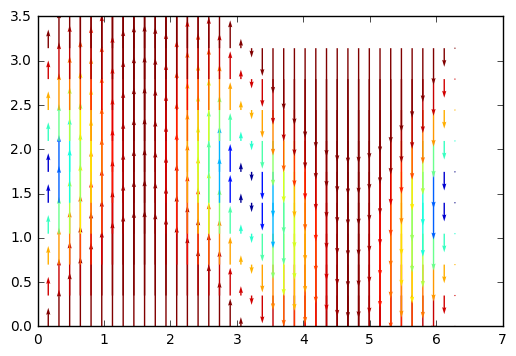

In [20]:

q = plt.quiver(az,el, OF_mat_rot2[0,:,:], OF_mat_rot2[1,:,:],
                #              OF2[2,:,:] , 
                np.linalg.norm(OF_mat_rot2[:,:,:],axis=0)/100 , 
               scale =4)
plt.show()

In [21]:

def estimateDistance(spx, spy, spz, rsp, pos_rot_X,pos_rot_Y, pos_rot_Z, pos_begin, noInter, V):
    d_store= []
    d_pos = []
    d_vec=[]
    i_loc=[]
    d_pos2 = []
    OF_pix = []
    OF_x= []
    OF_y = []
    OF_z = []
    for i in range (len(pos_rot_X)):
        # Define two point along vector line
        l2 = np.array([pos_rot_X[i] + pos_begin[0], pos_rot_Y[i]+pos_begin[1], pos_rot_Z[i]+pos_begin[2]])
        l1 = pos_begin
        for j in range(len(spx)):
            #takes two points along the unit vector of one pixel, and finds its intersection point with a sphere
            p1, p2 = sphere_line_intersection(pos_begin,  # begin position point, all point
                            l2,
                            [spx[j], spy[j], spz[j]], # sphere coordinates
                                              rsp[j]) # radius sphere
            # This computes the minimum distance to the sphere for one sphere
            if p1!=None or p2!=None:
                p1Vec =  np.array(p1) - pos_begin
                p2Vec =  np.array(p2) - pos_begin
                l2Vec = l2 - pos_begin
                if (np.sum((p1Vec >= 0 )*1-(l2Vec>= 0)*1)) == 0:
                    d_vec.append(distance_intersection(p1, p2, l2))
                if (np.sum((p1Vec >= 0 )*1-(l2Vec>= 0)*1)) == 0:
                    d_vec.append(distance_intersection(p1, p2, l2))
                #print (d_vec)
                #print(d_vec)
        if d_vec== []:
            d_store.append(noInter)
            d_pos.append(l2)
            OF_pix.append([0,0,0])
            OF_x.append(0)
            OF_y.append(0)
            OF_z.append(0)
        if d_vec!= [] :
            D = np.min(d_vec)
            d_store.append(np.min(d_vec))
            d_pos.append(l2)
            d_vec=[]
            # Ccompute Optic Flow
            OF = -np.divide((V - np.multiply(np.dot(V,[pos_rot_X[i], pos_rot_Y[i], pos_rot_Z[i]]),[pos_rot_X[i]
                                                                            , pos_rot_Y[i], pos_rot_Z[i]])), D)
            OF_x.append(OF[0])
            OF_y.append(OF[1])
            OF_z.append(OF[2])
            OF_pix.append(OF)
            if np.sum(OF)!= 0:
                print(OF, 'nonzero', i)
    OF_pix = np.vstack((np.array(OF_x), np.array(OF_y), np.array(OF_z)))
    return d_store, OF_pix, OF_x, OF_y, OF_z

distances, OF_stack, OF_vec_x, OF_vec_y, OF_vec_z= estimateDistance(spx, spy, spz, rsp, rot_vec_x,rot_vec_y, rot_vec_z, pos_begin, False, V)
print(np.shape(np.array(OF_stack)))

OF_mat= OF_stack.reshape(3,pix_x,pix_y)

print(np.shape(OF_mat))

[ 0.44858348 -0.26932851  0.1702032 ] nonzero 364
[ 0.44858348 -0.26932851 -0.1702032 ] nonzero 365
[ 0.2586053  -0.11310319  0.14399653] nonzero 374
[ 0.2586053  -0.11310319 -0.14399653] nonzero 375
(3, 400)
(3, 40, 10)


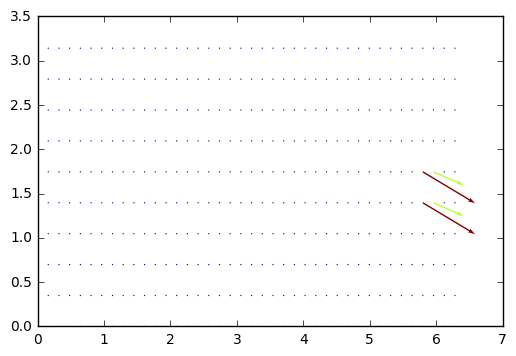

In [22]:

q = plt.quiver(az,el, OF_mat[0,:,:], OF_mat[1,:,:],
                #              OF2[2,:,:] , 
                np.linalg.norm(OF_mat[:,:,:],axis=0)/100 , 
               scale = 4)
plt.show()



In [23]:


# Rotate optic flow vectors back
OF_rot_vec_x= []
OF_rot_vec_y = []
OF_rot_vec_z= []
OF_rot_vec_x1= []
OF_rot_vec_y1 = []
OF_rot_vec_z1= []
for i in range(len(alpha)):
    az_vec = az.flatten()
    el_vec = el.flatten()
    az_heading_included = az_vec + alpha
    az_rot = az_heading_included[i]
    el_rot = el_vec[i]
    rot_z = np.array([np.cos(az_rot)*np.cos(el_rot), np.sin(az_rot), np.cos(az_rot)*np.sin(el_rot)
                      ,-np.sin(az_rot)*np.cos(el_rot), np.cos(az_rot), -np.sin(el_rot)*np.sin(az_rot),
                       -np.sin(el_rot),0,np.cos(el_rot)])
#     rot_z = np.array([np.cos(az_rot), np.sin(az_rot)*np.cos(el_rot), np.sin(az_rot)*np.sin(el_rot)
#                       ,-np.sin(el_rot), np.cos(az_rot)*np.cos(el_rot), np.sin(el_rot)*np.cos(az_rot),
#                        0, -np.sin(el_rot),np.cos(el_rot)])
    
    rot_z1 = np.array([np.cos(az_rot)*np.cos(el_rot), np.sin(az_rot)*np.cos(el_rot), np.sin(el_rot)
                      ,-np.sin(az_rot), np.cos(az_rot), 0,
                       -np.sin(el_rot)*np.cos(az_rot),-np.sin(el_rot) * np.sin(az_rot),np.cos(el_rot)])
    
    rot_z = rot_z.reshape(3,3)
    rot_z1 = rot_z1.reshape(3,3)
    #print(rot_z)
    mat = np.array([OF_vec_x[i],OF_vec_y[i], OF_vec_z[i]])
    mat_rot_z = np.dot(rot_z, mat)
    mat_rot_z1 = np.dot(rot_z1, mat)
    OF_rot_vec_x.append(mat_rot_z[0])
    OF_rot_vec_y.append(mat_rot_z[1])
    OF_rot_vec_z.append(mat_rot_z[2])
    OF_rot_vec_x1.append(mat_rot_z1[0])
    OF_rot_vec_y1.append(mat_rot_z1[1])
    OF_rot_vec_z1.append(mat_rot_z1[2])
    if np.sum(mat_rot_z)!= 0:
        print(mat_rot_z, 'nonzero', i)
    if np.sum(mat_rot_z1)!= 0:
        print(mat_rot_z1, 'nonzero', i)

OF_mat_rot = np.vstack([OF_rot_vec_x, OF_rot_vec_y, OF_rot_vec_z])
OF_mat_rot2 = OF_mat_rot.reshape(3, pix_x,pix_y)
#print(OF_mat_rot2)


[-0.12438291 -0.34255428 -0.41221301] nonzero 364
[ 0.162406   -0.52236414  0.05911095] nonzero 364
[-0.35257419  0.09222788 -0.41221301] nonzero 365
[-0.162406   -0.52236414  0.05911095] nonzero 365
[-0.04815576 -0.21292237 -0.22967177] nonzero 374
[ 0.13739989 -0.28111272  0.05000947] nonzero 374
[-0.16640924  0.14129005 -0.22967177] nonzero 375
[-0.13739989 -0.28111272  0.05000947] nonzero 375


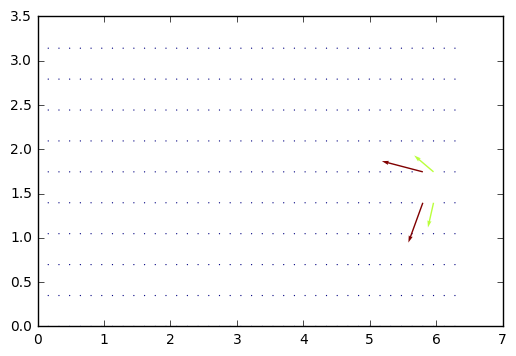

In [24]:

q = plt.quiver(az,el, OF_mat_rot2[0,:,:], OF_mat_rot2[1,:,:],
                #              OF2[2,:,:] , 
                np.linalg.norm(OF_mat_rot2[:,:,:],axis=0)/100 , 
               scale =4)
plt.show()

In [ ]:
# create 3D vecotr plot

figVec = True

if figVec == True:
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    #ax.plot_wireframe(x, y, z, color="r")
    for i in range(1,len(OF_vec_x),1):
        if OF_vec_x[i] != 0:
#             a = Arrow3D([pos_begin[0]+rot_vec_x[i], pos_begin[0]+rot_vec_x[i]
#                          + OF_vec_x[i]*k], 
#                         [pos_begin[1]+rot_vec_y[i],rot_vec_y[i]+pos_begin[1]+ OF_vec_y[i]*k],
#                         [pos_begin[2]+rot_vec_z[i] ,pos_begin[2]+ OF_vec_z[i]*k+rot_vec_z[i]],
#                         mutation_scale=1,
#                 lw=0.5, arrowstyle="-|>")#, color="k")
            k = 1
            a = Arrow3D([pos_begin[0]+rot_vec_x[i], #pos_begin[0]+rot_vec_x[i] +
                         OF_rot_vec_x[i]*k], 
                        [pos_begin[1]+rot_vec_y[i],#rot_vec_y[i]+pos_begin[1]+
                         OF_rot_vec_y[i]*k],
                        [pos_begin[2]+rot_vec_z[i] ,#pos_begin[2]+rot_vec_z[i]]+,
                         OF_rot_vec_z[i]*k],
                        mutation_scale=10,
                lw=0.5, arrowstyle="-|>")#, color="k")
            
            q = ax.add_artist(a)
#         k = 10
#         ax.set_xlim([-0.20*k, 0.20*k])
#         ax.set_ylim([-0.20*k, 0.20*k])
#         ax.set_zlim([-0.20*k,0.20*k])
    kVec = 2
#     a = Arrow3D([pos_begin[0], pos_begin[0]+V[0]*kVec], 
#                 [pos_begin[1],pos_begin[1]+ V[1]*kVec],
#                 [pos_begin[2],pos_begin[2]+V[2]*kVec], mutation_scale=10,lw=1, arrowstyle="-|>", color="r")
    a = Arrow3D([pos_begin[0],V[0]*kVec], 
                [pos_begin[1], V[1]*kVec],
                [pos_begin[2],V[2]*kVec], mutation_scale=10,lw=1, arrowstyle="-|>", color="r")
    q = ax.add_artist(a)
    for i in range(len(rsp)):
 
        u1, v1 = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        r = rsp[i]
        center_x = spx[i]
        center_y = spy[i]
        center_z = spz[i]
        x2 = r * np.outer(np.cos(u1), np.sin(v1)) + center_x
        y2 = r * np.outer(np.sin(u1), np.sin(v1)) + center_y
        z2 = r * np.outer(np.ones(np.size(u1)), np.cos(v1)) + center_z
        q = ax.plot_wireframe(x2, y2, z2, color="r")

    r = 1
    center_x = pos_begin[0]
    center_y = pos_begin[1]
    center_z = pos_begin[2]
    x2 = r * np.outer(np.cos(u1), np.sin(v1)) + center_x
    y2 = r * np.outer(np.sin(u1), np.sin(v1)) + center_y
    z2 = r * np.outer(np.ones(np.size(u1)), np.cos(v1)) + center_z
    q = ax.plot_wireframe(x2, y2, z2, color="g")
    #ax.add_artist(a)
    plt.show()

In [ ]:
theta = np.pi/2
phi = 0
r = 1
center = [1,1,0]
point_x = []
point_y = []
point_z = []
normal = np.array([np.cos(phi)*np.sin(theta), np.sin(theta)*np.sin(phi), np.cos(theta) ])
u_vec = np.array([-np.sin(phi), -np.cos(phi), 0])
print(u_vec)
n_cross_u = np.array([np.cos(theta)*np.cos(phi), np.cos(theta) *np.sin(phi), -np.sin(theta)])
print(normal, n_cross_u)
point_plot = []
t = np.arange(0,np.pi*2.1, 0.1)
for i in np.nditer(t):
    point= np.multiply(r * np.cos(i) ,u_vec ) + r* np.sin(i) *n_cross_u + center
    point_plot.append(point)
    point_x.append(point[0])
    point_y.append(point[1])
    point_z.append(point[2])
print(point_plot)
center_x = pos_begin[0]
center_y = pos_begin[1]
center_z = pos_begin[2]


fig = plt.figure()
ax = fig.gca(projection='3d')

q = ax.plot(point_x, point_y, point_z, color="g")

plt.show()

In [ ]:
# # draw sphere
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.set_aspect("equal")
# for i in range(len(rsp)):
 
#     u1, v1 = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
#     # x = np.cos(u)*np.sin(v)
#     # y = np.sin(u)*np.sin(v)
#     # z = np.cos(v)
#     r = rsp[i]
#     center_x = spx[i]
#     center_y = spy[i]
#     center_z = spz[i]
#     x = r * np.outer(np.cos(u1), np.sin(v1)) + center_x
#     y = r * np.outer(np.sin(u1), np.sin(v1)) + center_y
#     z = r * np.outer(np.ones(np.size(u1)), np.cos(v1)) + center_z
#     q = ax.plot_wireframe(x, y, z, color="r")
#     plt.hold(True)
# plt.show()